In [1]:
import ingest
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
inpatient = ingest.get_cache_data("Inpatient", "~/Downloads/inpatient.pkl")
icd_features = [c for c in inpatient.columns if "ICD9_DGNS_CD_" in c]
data = inpatient[icd_features + ["CLM_PMT_AMT"]]

INFO:root:Reading local cache file /Users/nankivel/Downloads/inpatient.pkl


In [3]:
summary = data.groupby('ICD9_DGNS_CD_1')["CLM_PMT_AMT"].count().reset_index().sort_values("CLM_PMT_AMT", ascending=False)

<AxesSubplot:xlabel='ICD9_DGNS_CD_1'>

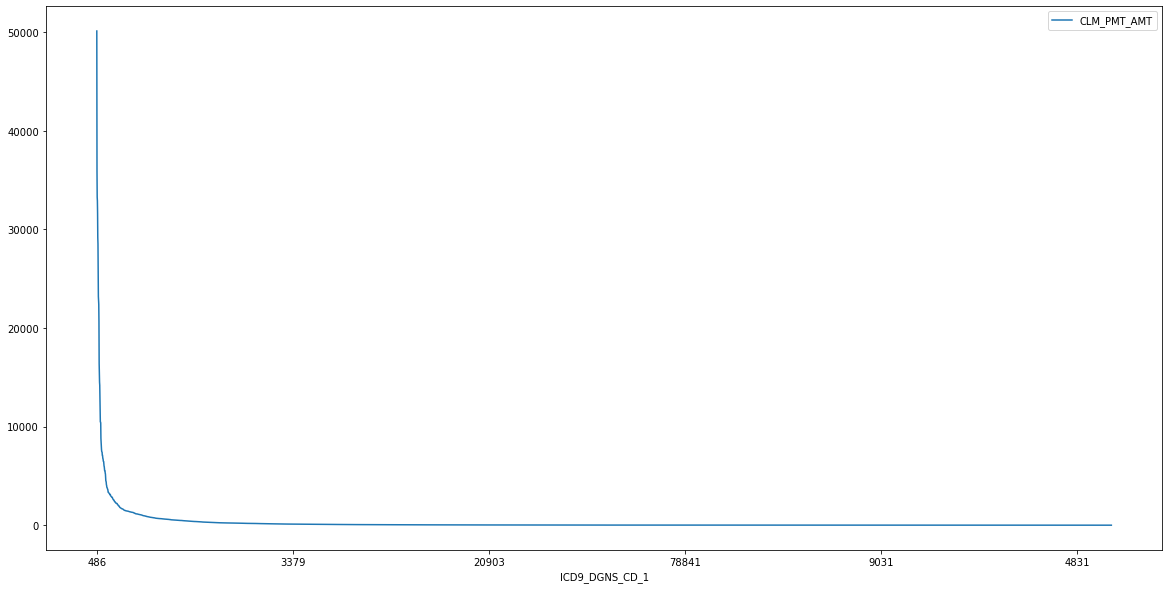

In [4]:
summary.plot(x="ICD9_DGNS_CD_1", y="CLM_PMT_AMT", figsize=(20,10))

<AxesSubplot:xlabel='ICD9_DGNS_CD_1'>

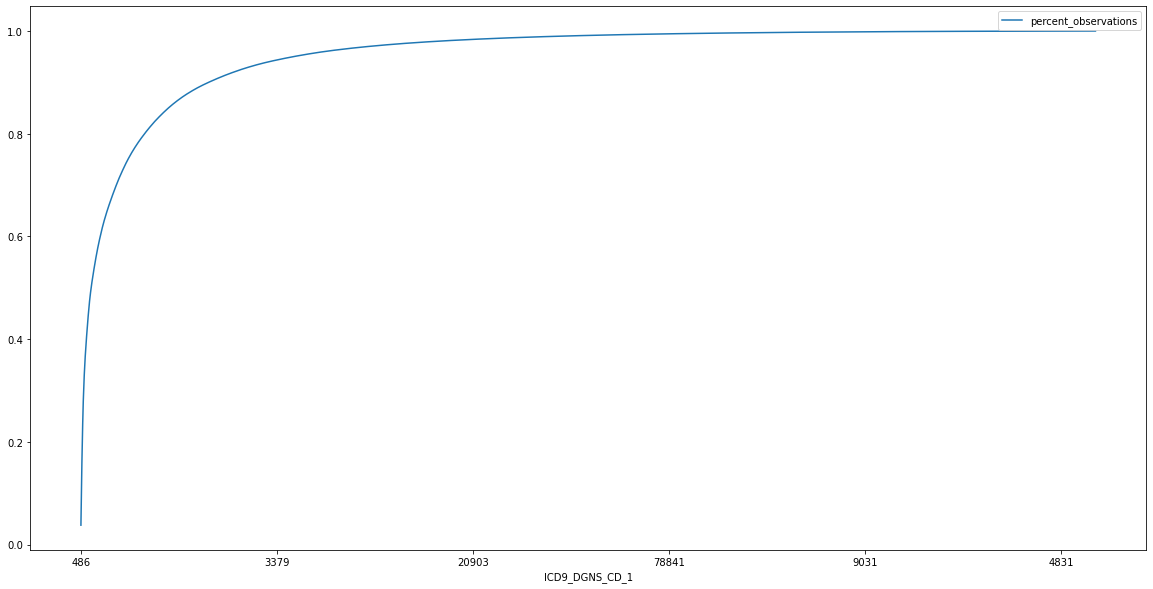

In [9]:
summary["cumsum"] = summary["CLM_PMT_AMT"].cumsum()
summary["percent_observations"] = summary["cumsum"] / summary["CLM_PMT_AMT"].sum()
summary.plot(x="ICD9_DGNS_CD_1", y="percent_observations", figsize=(20,10))

In [10]:
summary[summary["percent_observations"] <= .95]

,ICD9_DGNS_CD_1,CLM_PMT_AMT,cumsum,percent_observations
2312,486,50111,50111,0.037648
5136,V5789,35902,86013,0.064621
1909,41401,33257,119270,0.089607
91,0389,32889,152159,0.114316
2324,49121,31619,183778,0.138071
...,...,...,...,...
3580,73008,96,1264038,0.949665
466,1880,96,1264134,0.949737
818,23879,95,1264229,0.949808
1211,29592,95,1264324,0.949880
